In [1]:
import random, copy
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
from IPython.display import clear_output 
import time



In [2]:
# https://www.codewars.com/kata/625c70f8a071210030c8e22a

In [3]:

cave1 = [
    [*"____"],
    [*"_W__"],
    [*"___G"],
    [*"P___"]
]

        
cave2 = [
    [*"____"],
    [*"_P__"],
    [*"____"],
    [*"_W_G"]
]

        
cave3 = [
    [*"____"],
    [*"____"],
    [*"W__P"],
    [*"__PG"]
]


cave4 = [
    [*"__GP"],
    [*"_P__"],
    [*"W___"],
    [*"____"]
]


cave5 = [
    [*"__W_"],
    [*"____"],
    [*"___P"],
    [*"___G"]
]


cave6 = [
    [*"__W_"],
    [*"____"],
    [*"__PP"],
    [*"___G"]
]


cave7 = [
    [*"__W_"],
    [*"____"],
    [*"_PPP"],
    [*"___G"]
]


cave8 = [
    [*"___P"],
    [*"__PG"],
    [*"___P"],
    [*"W___"]
]


cave9 = [
    [*"__P_"],
    [*"____"],
    [*"__P_"],
    [*"__WG"]
]


cave10 = [
    [*"____"],
    [*"__PW"],
    [*"PG__"],
    [*"____"]
]


cave11 = [
    [*"__P_"],
    [*"____"],
    [*"WP__"],
    [*"_G__"]
]


cave12 = [
    [*"__PG"],
    [*"____"],
    [*"__WP"],
    [*"____"]
]


cave13 = [
    [*"___W"],
    [*"__P_"],
    [*"__G_"],
    [*"P___"]
]


cave14 = [
    [*"__WP"],
    [*"_P__"],
    [*"____"],
    [*"_G__"]
]


cave15 = [
    [*"__WP"],
    [*"____"],
    [*"__P_"],
    [*"P_G_"]
]


cave16 = [
    [*"__PG"],
    [*"___W"],
    [*"__PP"],
    [*"____"]
]


In [27]:
#takes a cave system as an input and creates a list for each cave room, 
#including all senses available in those rooms, nominated by a lower case of the
#relevant feature being sensed

def true_cave(cave):
    true_cave = [[[] for i in range(4)] for i in range(4)]
    for j in range(4):
        for i in range(4):
            if cave[j][i] != '_':
                true_cave[j][i].append(cave[j][i])
            neighbours = get_neighbours(j,i,cave)
            for neighbour in neighbours:
                if cave[neighbour[0]][neighbour[1]] in [X for X in ['W','P'] if X.lower() not in true_cave[j][i]]:
                    true_cave[j][i].append((cave[neighbour[0]][neighbour[1]]).lower())
    return true_cave

In [5]:
def get_neighbours(y,x,grid):
    #lists neighbour squares for a given square

    neighbours = []

    for i in [-1,1]:
        
        if -1 < y + i < len(grid):
            neighbours.append((y + i, x))
        if -1 < x + i < len(grid[0]):
            neighbours.append((y, x + i))
        
    return(neighbours)

In [6]:
def navigable_neighbours(grid):
    #lists navigable squares for a grid and lists navigable neighbours as a dic
    #for each address
    navigable = []
    neighbours = {}
    for y in range(len(grid)):
        for x in range(len(grid[0])):
            if grid[y][x] == '_':
                navigable.append((y,x))
                neighbours[(y,x)] = [loc for loc in get_neighbours(y,x,grid) if grid[loc[0]][loc[1]] == '_']

    return navigable, neighbours

It occurs to me that this should be solvable by assessing grids against a set of rules that will determine solvability. Out of interest I am now investigating creating an algorithm that solves the puzzle, step by step, displaying the action in real time. It seems to me that being able to navigate through known safe areas from a to b will be useful and interesting to investigate.  

In [7]:
def navigate(start, end, grid):
    #generates a list of coordinates that represent a sequential path between 
    #navigable points
    
    neighbours = navigable_neighbours(grid)[1]

    active_routes = [[start]]
    
    for i in neighbours.values():
        if start in i:
            i.remove(start)
    
    primary_routes = []

    progressing = True
    while progressing:

        progressing = False
        route_progression = []

        for route in active_routes:
            options = neighbours[route[-1]].copy()
            if options == []:
                primary_routes.append(route)
            else:
                progressing = True

            for opt in options:
                
                route_seed = route.copy()
                route_seed.append(opt)
                route_progression.append(route_seed)
                
                for i in neighbours.values():
                    if opt in i:
                        i.remove(opt) 

        active_routes = route_progression

    primary_routes.extend(route_progression)

    for i in primary_routes:
        if end in i:
            for j in range(len(i)):
                if i[j] == end:
                    return i[:j+1]

In [8]:
def generate_grid(height, width, barrier_rate):

    # generates a wumpus world style grid (list of lists) of specified 
    #dimensions with a certain rate (in % terms) of wumpus world style 
    #obstructions, '-' being passable, 'W' being impassable   

    limiting = width

    if width > height:
        limiting = height

    if barrier_rate > 40:
        barrier_rate = 40

    grid = [['_' for x in range(width)] for y in range(height)]

    for y in range(len(grid)):
        for x in range(len(grid[0])):
            barrier = random.randint(1,100//barrier_rate)
            if barrier == 1:
                barrier_len = random.randint(1,round(limiting**0.5))
                barrier_orient = random.randint(0,1)
                if barrier_orient == 0:
                    if barrier_len > len(grid[0]) - x:
                        barrier_len = len(grid[0]) - x
                    grid[y][x:x+barrier_len] = ['W' for i in range(barrier_len)]
                else:
                    if barrier_len > len(grid) - y:
                        barrier_len = len(grid) - y
                    for j in range(barrier_len):
                        grid[y+j][x] = 'W'
    return grid

In [9]:
def convert_grid(grid):
    #converts a wumpus world sytle grid into one with integer values for colour
    # display

    grid_out = []

    map_dict = {'_':0, 'W':1}

    for i in grid:
        row = [map_dict[j] for j in i]
        grid_out.append(row)
    
    return grid_out

In [10]:
def show_grid(grid, figsize):

    #displays coloured grid with coordinates as axis labels

    cmap = cmap = colors.ListedColormap(['LightGrey', 'coral', 'LawnGreen', 'g', 'r'])
    fig, ax = plt.subplots(figsize = figsize)
    bounds = [0,0.5,1.5,2.5,3.5,4]
    norm = colors.BoundaryNorm(bounds, cmap.N)
    ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=1)
    ax.set_xticks(ticks = np.arange(-.5, len(grid[0]), 1));
    ax.set_yticks(np.arange(-.5, len(grid), 1));
    ax.tick_params(labelbottom=True,labelleft=True, labeltop = True, labelright = True)
    ax.set_xticklabels(range(0,len(grid[0])))
    ax.set_yticklabels(range(0,len(grid)))
    ax.imshow(grid, cmap=cmap, norm=norm)
    plt.show()

In [11]:
def show_path(start, end, grid, reduce_steps = True, figsize = (15,15)):
    #with a chosen start and end point, displays a progressive path accross a 
    #grid if navigable
    
    path = navigate(start, end, grid)

    grid_path = convert_grid(grid)

    grid_path[start[0]][start[1]] = 3
    grid_path[end[0]][end[1]] = 4
    
    show_grid(grid_path,figsize)

    display_steps = list(np.linspace(0,1,10))
    cycle = 0
    
    if reduce_steps and len(path) > 11:
    
        for i in range(len(path)):

            cycle += 1

            clear_output(wait=True)
            grid_path[path[i][0]][path[i][1]] = 2

            if cycle/len(path) >= display_steps[0]:
                display_steps.pop(0)
                show_grid(grid_path,figsize)
    else:

        for i in range(len(path)):

            clear_output(wait=True)
            grid_path[path[i][0]][path[i][1]] = 2
            show_grid(grid_path,figsize)

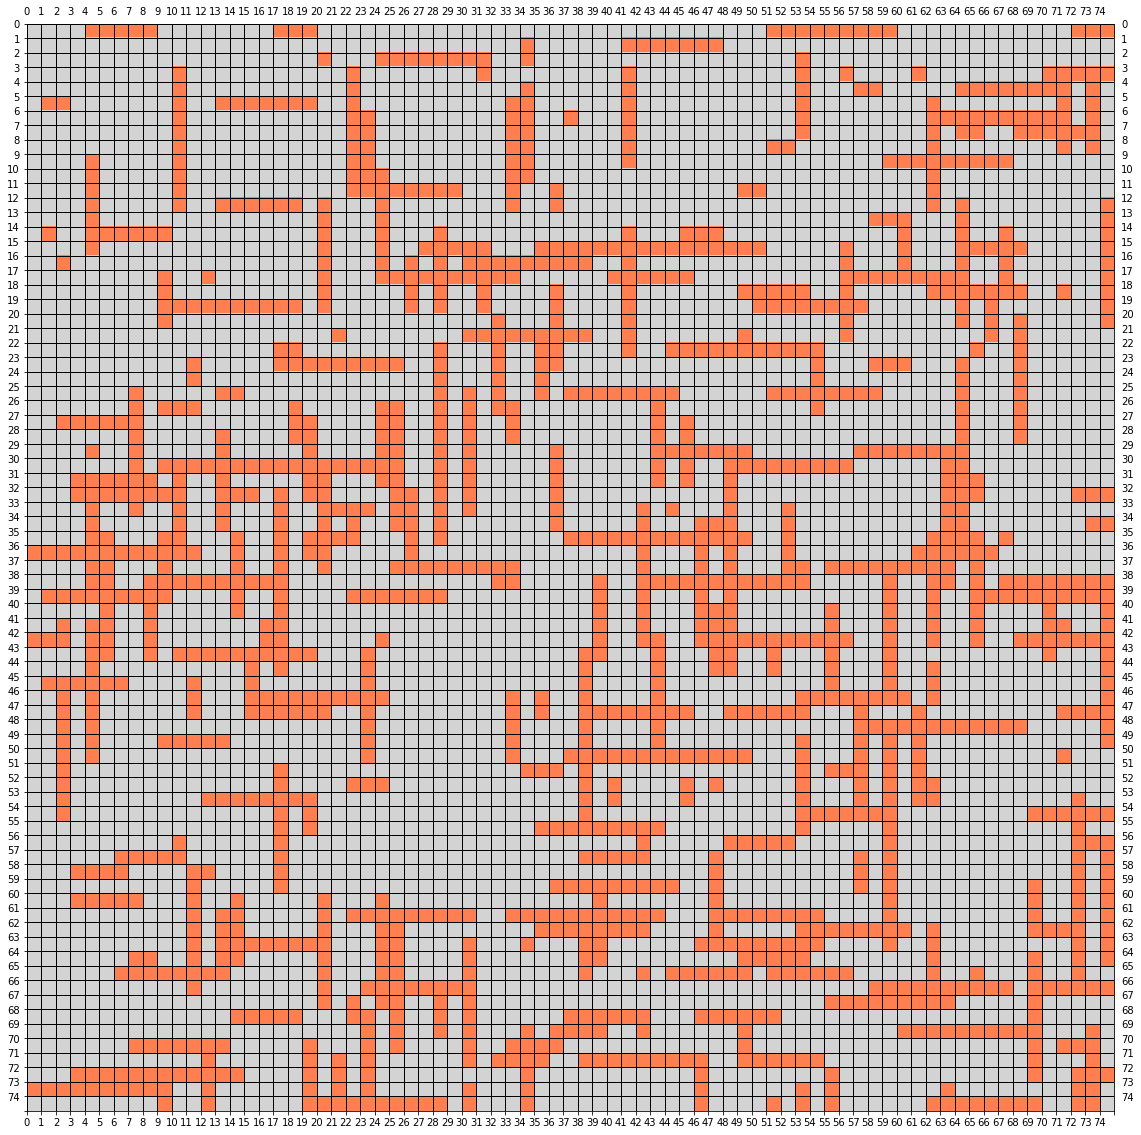

In [12]:
#generating a random grid with obstacles 

height = 75
width = 75
barrier_rate = 6 

figsize = (20,20)

grid = generate_grid(height,width,barrier_rate)
display_grid = convert_grid(grid)
show_grid(display_grid,figsize)

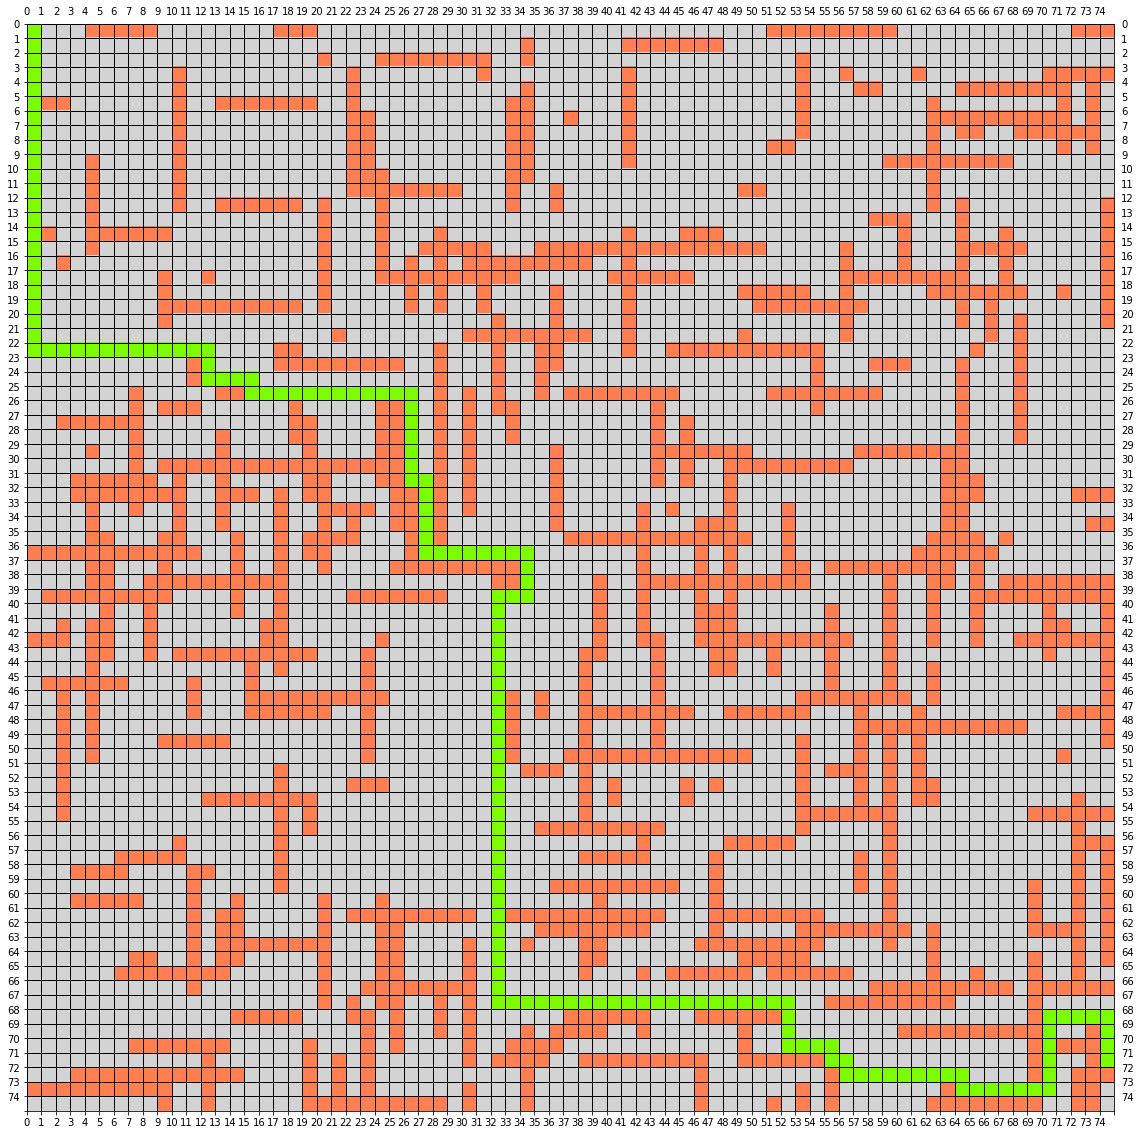

In [13]:
#choosing a valid start and end point to show a path between (run cell to visualise in motion)

start = (0,0)
end = (71,74)
figsize = (20,20)
show_path(start, end, grid, figsize = figsize)

In [14]:
cave1

[['_', '_', '_', '_'],
 ['_', 'W', '_', '_'],
 ['_', '_', '_', 'G'],
 ['P', '_', '_', '_']]

In [28]:
true_cave(cave1)

[[[], ['w'], [], []],
 [['w'], ['W'], ['w'], []],
 [['p'], ['w'], [], ['G']],
 [['P'], ['p'], [], []]]

In [29]:
get_neighbours(2,2,cave1)

[(1, 2), (2, 1), (3, 2), (2, 3)]

In [34]:
possibilities = [[['P','W','G'] for i in range(4)] for j in range(4)] 

In [35]:
possibilities[0][0].pop()
possibilities

[[['P', 'W'], ['P', 'W', 'G'], ['P', 'W', 'G'], ['P', 'W', 'G']],
 [['P', 'W', 'G'], ['P', 'W', 'G'], ['P', 'W', 'G'], ['P', 'W', 'G']],
 [['P', 'W', 'G'], ['P', 'W', 'G'], ['P', 'W', 'G'], ['P', 'W', 'G']],
 [['P', 'W', 'G'], ['P', 'W', 'G'], ['P', 'W', 'G'], ['P', 'W', 'G']]]

In [36]:
cave2

[['_', '_', '_', '_'],
 ['_', 'P', '_', '_'],
 ['_', '_', '_', '_'],
 ['_', 'W', '_', 'G']]

In [37]:
cave3


[['_', '_', '_', '_'],
 ['_', '_', '_', '_'],
 ['W', '_', '_', 'P'],
 ['_', '_', 'P', 'G']]

In [38]:
cave4

[['_', '_', 'G', 'P'],
 ['_', 'P', '_', '_'],
 ['W', '_', '_', '_'],
 ['_', '_', '_', '_']]

In [45]:
def sensed_neighbours(y,x,grid):
    sensed_neighbours = []
    neighbours = get_neighbours(y,x,grid)
    
    for neighbour in neighbours:
        if grid[neighbour[0]][neighbour[1]] != '_':                  
            sensed_neighbours.append(grid[neighbour[0]][neighbour[1]])

    return sensed_neighbours

In [46]:
sensed_neighbours(1,0,cave4)

['W', 'P']